In [1]:
import pandas as pd
import glob
import re

ticks = [
    pd.read_csv(f, index_col='Date').Close.fillna(method='ffill').rename(f)
    for f in glob.glob('data/*.yahoo.*')
]

ticks = [t.rename(re.match('.+/([^.]+).+', t.name).group(1)) for t in ticks]
ticks = [t[~t.index.duplicated()] for t in ticks]

ticks_df = pd.concat(ticks, join='inner', axis=1)
change_df = ticks_df.pct_change().dropna()
change_df.corr().style.background_gradient(cmap='bwr', vmin=-1, vmax=1)

,CL=F,NVDA,ZEC-USD,GC=F,BTC-USD,^GSPC,^IXIC,RUB=X
CL=F,1.000000,0.050126,0.073205,0.097908,-0.004732,0.193626,0.145311,0.027445
NVDA,0.050126,1.000000,-0.043857,-0.136660,0.034880,0.533916,0.618540,0.052234
ZEC-USD,0.073205,-0.043857,1.000000,0.094506,0.243015,0.003308,0.009106,-0.097248
GC=F,0.097908,-0.136660,0.094506,1.000000,0.030614,-0.064365,-0.042447,-0.104005
BTC-USD,-0.004732,0.034880,0.243015,0.030614,1.000000,0.028405,0.027146,0.016147
^GSPC,0.193626,0.533916,0.003308,-0.064365,0.028405,1.000000,0.946041,-0.043644
^IXIC,0.145311,0.618540,0.009106,-0.042447,0.027146,0.946041,1.000000,-0.027194
RUB=X,0.027445,0.052234,-0.097248,-0.104005,0.016147,-0.043644,-0.027194,1.000000


In [26]:
change_df = ticks_df.rolling(5).sum().dropna().pct_change().dropna()
change_df.corr().style.background_gradient(cmap='bwr', vmin=-1, vmax=1)

,CL=F,NVDA,ZEC-USD,GC=F,BTC-USD,^GSPC,^IXIC,RUB=X
CL=F,1.000000,0.207605,0.035103,0.122847,0.071558,0.286754,0.242805,-0.258124
NVDA,0.207605,1.000000,-0.051279,-0.079926,0.126232,0.550529,0.635232,0.007563
ZEC-USD,0.035103,-0.051279,1.000000,0.169651,0.358577,-0.001417,0.012640,-0.060551
GC=F,0.122847,-0.079926,0.169651,1.000000,-0.001595,-0.035752,0.017942,-0.264598
BTC-USD,0.071558,0.126232,0.358577,-0.001595,1.000000,0.109229,0.101863,0.058806
^GSPC,0.286754,0.550529,-0.001417,-0.035752,0.109229,1.000000,0.938462,-0.172751
^IXIC,0.242805,0.635232,0.012640,0.017942,0.101863,0.938462,1.000000,-0.154131
RUB=X,-0.258124,0.007563,-0.060551,-0.264598,0.058806,-0.172751,-0.154131,1.000000


In [20]:
nticks = (ticks_df-ticks_df.mean())/ticks_df.std()
nticks.corr().style.background_gradient(cmap='bwr', vmin=-1, vmax=1)

,CL=F,NVDA,ZEC-USD,GC=F,BTC-USD,^GSPC,^IXIC,RUB=X
CL=F,1.000000,0.829505,0.029382,0.094503,0.608382,0.780143,0.785410,0.308642
NVDA,0.829505,1.000000,0.134665,0.254003,0.735121,0.816750,0.824525,0.165485
ZEC-USD,0.029382,0.134665,1.000000,0.268903,0.323631,-0.031998,-0.041810,-0.234929
GC=F,0.094503,0.254003,0.268903,1.000000,0.414057,0.285384,0.287769,-0.301543
BTC-USD,0.608382,0.735121,0.323631,0.414057,1.000000,0.643245,0.605272,-0.067297
^GSPC,0.780143,0.816750,-0.031998,0.285384,0.643245,1.000000,0.990922,0.416702
^IXIC,0.785410,0.824525,-0.041810,0.287769,0.605272,0.990922,1.000000,0.458619
RUB=X,0.308642,0.165485,-0.234929,-0.301543,-0.067297,0.416702,0.458619,1.000000


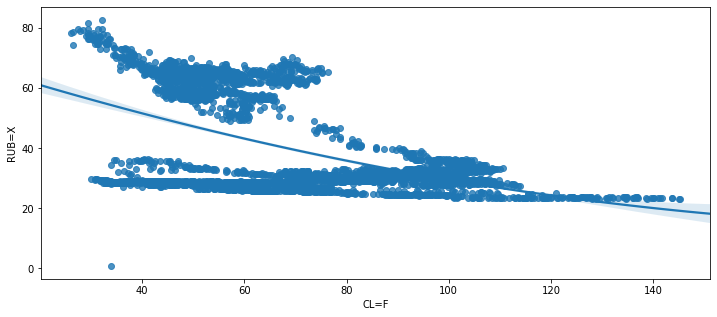

In [15]:
import seaborn as sns
import matplotlib as mpl

ticks = [
    pd.read_csv(f, index_col='Date').Close.fillna(method='ffill').rename(f)
    for f in ['data/CL=F.yahoo.csv', 'data/RUB=X.yahoo.csv']
]

ticks = [t.rename(re.match('.+/([^.]+).+', t.name).group(1)) for t in ticks]
ticks = [t[~t.index.duplicated()] for t in ticks]

ticks_df = pd.concat(ticks, join='inner', axis=1)

with mpl.rc_context() as rc:
    mpl.rc("figure", figsize=(12,5))
    sns.regplot(x="CL=F", y="RUB=X", data=ticks_df, order=2)